<a href="https://colab.research.google.com/github/nivla0607/CS114.L22.KHCL/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Thành viên nhóm


*   Nguyễn Phạm Vĩnh Nguyên - 19520186
*   Phạm Minh Khôi - 19520658
*   Phạm Quốc Đạt - 19521349






## Reference


*   https://matplotlib.org/stable/contents.html
*   https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

*   https://github.com/karthickai/Linear-Regression
*   https://numpy.org/doc/stable/reference/






## Data

> Train data: https://cs.uit.edu.vn/data2.txt


> Test data: https://cs.uit.edu.vn/data3.txt





## Import Data


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
train_data  = pd.read_csv('https://cs.uit.edu.vn/data2.txt', header=None, usecols= [0,1], names= ['Input', 'Running time'])
test_data = pd.read_csv('https://cs.uit.edu.vn/data3.txt', header = None, usecols= [0,1], names = ['Input', 'Running time']) 

In [ ]:
print(train_data)

         Input  Running time
0      6083695      0.521842
1      1954367      0.152648
2      3734185      0.298548
3      5839301      0.460480
4      6343427      0.527977
...        ...           ...
71110  4472112      0.350379
71111  5471895      0.429955
71112  9837364      0.801394
71113  9466593      0.776407
71114  4080801      0.314468

[71115 rows x 2 columns]


In [ ]:
print(test_data)

          Input  Running time
0      37837612       4.12166
1      37395246       3.92089
2      36610827       3.21540
3      29555651       2.54506
4      25928216       2.21831
...         ...           ...
10585  26872494       2.35117
10586  20753811       1.79155
10587  33520323       2.90918
10588  21243264       1.80292
10589  21380484       1.82795

[10590 rows x 2 columns]


## Data Visualization

Text(0, 0.5, 'Running time')

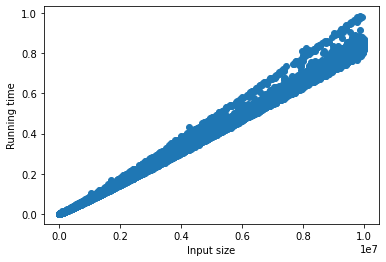

In [ ]:
plt.scatter(train_data['Input'], train_data['Running time'])
plt.xlabel('Input size')
plt.ylabel('Running time')

Text(0, 0.5, 'Running time')

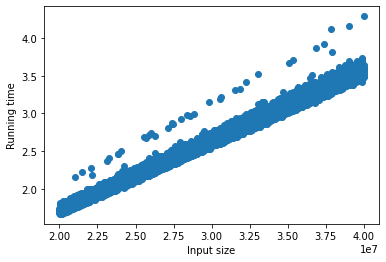

In [ ]:
plt.scatter(test_data['Input'], test_data['Running time'])
plt.xlabel('Input size')
plt.ylabel('Running time')

## Train Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math

In [ ]:
x_train, y_train = np.array(train_data['Input']).reshape(-1,1), np.array(train_data['Running time']).reshape(-1,1)
x_test, y_test = np.array(test_data['Input']).reshape(-1,1), np.array(test_data['Running time']).reshape(-1,1)
model = LinearRegression()

In [ ]:
def dimension_increase(x_train):
  X = x_train
  X = np.hstack((X,np.log2(x_train)))
  X = np.hstack((X,x_train*np.log2(x_train)))
  X = np.hstack((X,x_train**2))
  return X

### Linear Regression 2D Model

In [ ]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

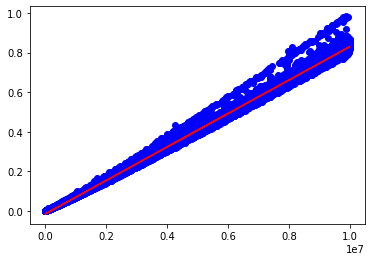

In [ ]:
plt.plot(x_train, y_train, 'bo')
plt.plot(x_train, lr.predict(x_train), 'r-')

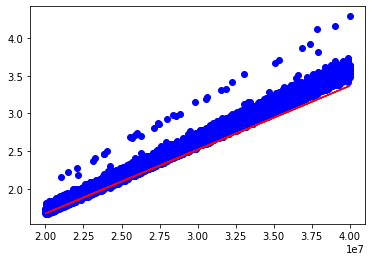

In [ ]:
plt.plot(x_test, y_test, 'bo')
plt.plot(x_test, lr.predict(x_test), 'r-')

In [ ]:
MSE_lr = mean_squared_error(y_test, lr.predict(x_test))
print('MSE 2D model:',MSE_lr)
avg = np.average(y_test)
print('Average y_test:', avg)
print('Error:(%)', (math.sqrt(MSE_lr)*100)/avg)

MSE 2D model: 0.020664949397549082
Average y_test: 2.642811968838527
Error:(%) 5.439398887357004


### Multivariate High-dimension Regression Model

In [ ]:
X_train = dimension_increase(x_train)
print(X_train)

[[6.08369500e+06 2.25365164e+01 1.37105292e+08 3.70113449e+13]
 [1.95436700e+06 2.08982700e+01 4.08428892e+07 3.81955037e+12]
 [3.73418500e+06 2.18323620e+01 8.15260786e+07 1.39441376e+13]
 ...
 [9.83736400e+06 2.32298404e+01 2.28520395e+08 9.67737305e+13]
 [9.46659300e+06 2.31744139e+01 2.19382744e+08 8.96163830e+13]
 [4.08080100e+06 2.19604209e+01 8.96161077e+07 1.66529368e+13]]


In [ ]:
X_test = dimension_increase(x_test)
print(X_test)

[[3.78376120e+07 2.51733177e+01 9.52498228e+08 1.43168488e+15]
 [3.73952460e+07 2.51563515e+01 9.40727954e+08 1.39840442e+15]
 [3.66108270e+07 2.51257670e+01 9.19875110e+08 1.34035265e+15]
 ...
 [3.35203230e+07 2.49985327e+01 8.37958891e+08 1.12361205e+15]
 [2.12432640e+07 2.43405021e+01 5.17071712e+08 4.51276265e+14]
 [2.13804840e+07 2.43497912e+01 5.20610321e+08 4.57125096e+14]]


In [ ]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

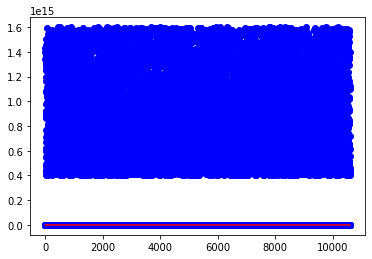

In [ ]:
plt.plot(X_test, 'bo' , model.predict(X_test), 'r-')

In [ ]:
MSE = mean_squared_error(y_test, model.predict(X_test))
print('MSE:',MSE)
avg_multi = np.average(y_test)
print('Average y_test:', avg_multi)
print('Error(%):',(math.sqrt(MSE)*100)/avg)

MSE: 0.004181175138868819
Average y_test: 2.642811968838527
Error(%): 2.4467123534333655


## Nhận xét


>- Nếu sử dụng mô hình Linear Regression 2 biến thông thường thì độ sai số của mô hình khoảng 5.44% bởi vì khi xét độ phức tạp của thuật toán thì ta có rất nhiều độ phức tạp khác như như O(log(n)), O(sqrt(n)), O(n), O(nlog(n)), O(n^2), ... còn mô hình đơn giản ban đầu chỉ bao quát được ở độ phức tạp O(n).

>- Khi thay đổi thành mô hình Multivariate Regression thì ta có thể bao quát được nhiều độ phức tạp hơn như O(log(n)), O(nlog(n)), O(n^2). Vì vậy, chúng em giảm được độ sai số còn khoảng 2.45%.

>- Tuy nhiên, chúng em có thể thấy được việc xử lý dữ liệu trước khi train rất quan trọng vì nó có thể làm tăng độ chính xác cho mô hình nên việc áp dụng các phương pháp tăng cường dữ liệu cũng như việc quan sát và nhận xét dữ liệu để đưa ra được một hypothesis phù hợp với dữ liệu chính là mấu chốt để làm cho mô hình hoạt động tốt hơn.